<h1>Portuguese Tweets for Sentiment Analysis using nltk and sklearn</h1>

<h2>Context</h2>
<br/>
This dataset has portuguese tweets divided in positive, negative and neutral classes for sentiment polarity classification.
<br/>
This dataset is very interesting, we are dealing with the popular language in social networks.
<br/>
It is necessary to perform some more careful treatment, such as noise removal, dimensionality reduction, object standardization and evaluation of some symbols, if they are important to express some sentiment.

<h4>Dataset</h4>
<ul>
  <li>Training dataset: Train3Classes.csv</li>
  <li>Test dataset: Test3Classes.csv</li>
   <li>Custom Stopwords: stopwords-pt-br.txt</li>
</ul> 

<h4>Columns description</h4>
<ul>
  <li>id: String identifier directly from Twitter</li>
  <li>tweet_text: Full text from the tweet</li>
  <li>tweet_date: Tweet creation date</li>
  <li>sentiment: Sentiment label (classifier)</li>
  <li>query_used: Query used to collect the tweet</li>
</ul> 

<h2>Content</h2>
<ul>
  <li>Load libraries</li>
  <li>Setup</li>
  <li>Load training dataset</li>
  <li>Load validation dataset</li>
  <li>Text preprocessing</li>
  <li>Exploratory analysis in words</li>
  <li>Bag-of-Words</li>
  <li>Prepare algorithm and run model</li>
  <li>Standalone predictions</li>
  <li>Evaluate the model</li>
  <li>Building a pipeline MultinomialNB</li>
  <li>Building a pipeline SGDClassifier, a linear support vector machine (SVM)</li>
  <li>Parameter tuning using grid search SGDClassifier</li>
  <li>Evaluating other models</li>
  <li>Implementing a Linear Classifier (Logistic Regression)</li>
  <li>Implementing a Support Vector Machine (SVM) Model</li>
  <li>Implementing Gradient Boosting Model</li>
  <li>Implementing Neural Networks (not implemented...)</li>
</ul>

<h2>Load libraries</h2>

In [4]:
import os
import pandas as pd
import numpy as np
import random
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import wordpunct_tokenize
# from nltk.tokenize import sent_tokenize (Tokenization)
from nltk.probability import FreqDist
from nltk.metrics import ConfusionMatrix
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

<h2>Setup</h2>

In [5]:
# predictor
X_col = 'tweet_text'
# classifier
y_col = 'sentiment' 

<h2>Load training dataset</h2>

<h4>Load and prepare X_train, y_train</h4>

In [6]:
train_ds = pd.read_csv('Train3Classes.csv', delimiter=';')

In [7]:
# update classifiers to nominal value
train_ds[y_col] = train_ds[y_col].map({0: 'Negative', 1: 'Positive', 2: 'Neutral'})

In [8]:
X_train = train_ds.loc[:, X_col].values
y_train = train_ds.loc[:, y_col].values

In [9]:
print(len(X_test))

NameError: name 'X_test' is not defined

<h4>Exploratory Analysis</h4>

In [11]:
# train_ds.head(5)
train_ds.sample(5)

,id,tweet_text,tweet_date,sentiment,query_used
17571,1047367450164174850,@sehunjj boa noite minha considerada :),Wed Oct 03 06:07:13 +0000 2018,Positive,:)
81708,1040965215972728832,Maternidade real para quem? https://t.co/5iWdu...,Sat Sep 15 14:07:02 +0000 2018,Neutral,folha
79744,1042417934654734336,"Não tenho um procurador-geral, diz Trump em at...",Wed Sep 19 14:19:37 +0000 2018,Neutral,exame
90355,1043488433576923136,#Fato Bom dia!!!! 🌞 https://t.co/NJnCczWe6J,Sat Sep 22 13:13:24 +0000 2018,Neutral,#fato
67725,1050083544762970112,&gt;@EstadaoPolitica PT tira nome de Lula e co...,Wed Oct 10 18:00:01 +0000 2018,Neutral,estadao


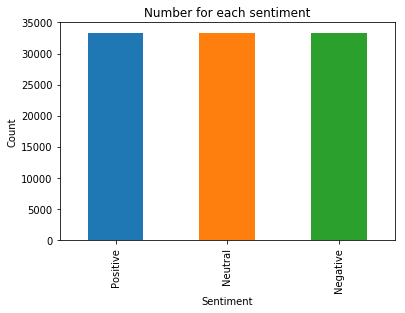

In [12]:
series = train_ds['sentiment'].value_counts()
ax = series.plot(kind='bar', title='Number for each sentiment')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
plt.show()

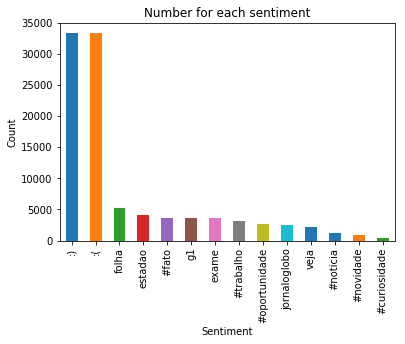

In [13]:
series = train_ds['query_used'].value_counts()
ax = series.plot(kind='bar', title='Number for each sentiment')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
plt.show()

In [14]:
# check data
for i in range(0, 5):
    print(y_train[i], ' => ', X_train[i])

Positive  =>  @Laranjito76 A pessoa certa para isso seria o vale e azevedo :)
Positive  =>  @behin_d_curtain Para mim, é precisamente o contrário :) Vem a chuva e vem a boa disposição :)
Positive  =>  Vou fazer um video hoje... estou pensando em falar um pouco sobre o novo meta do CSGO e sobre a pagina https://t.co/5RjhKnj0oh Alguem tem uma sugestao? Queria falar sobre algo do cenario nacional :D
Positive  =>  aaaaaaaa amei tanto essas polaroids, nem sei expressar o quanto eu to apaixonada de vdd✨💖🎈🎉🎊 espero que outras pessoas consigam ganhar também :) https://t.co/pbIp7tRcSE
Positive  =>  Valoriza o coração do menininho que vc tem. Ele é diferente. O faça sorrir e ter certeza disso ❤️ — Eu valorizo todo mundo na minha vida, não vai ser diferente com ele :)) https://t.co/5c7wlXQyz9


<h2>Load validation dataset</h2>

<h4>Load and prepare X_test, y_test</h4>

In [15]:
test_ds = pd.read_csv('Test3classes.csv', delimiter=';')

In [16]:
# update classifiers to nominal value
test_ds[y_col] = test_ds[y_col].map({0: 'Negative', 1: 'Positive', 2: 'Neutral'})

In [17]:
X_test = test_ds.loc[:, X_col].values
y_test = test_ds.loc[:, y_col].values

<h4>Exploratory Analysis</h4>

In [18]:
# test_ds.head(5)
test_ds.sample(5)

,id,tweet_text,tweet_date,sentiment,query_used
3932,1023259792553463808,Ex-presidente da Catalunha promete continuar c...,Sat Jul 28 17:32:00 +0000 2018,Neutral,jornaloglobo
3089,1030512875373252608,queria muito ter ido a escola hoje :(,Fri Aug 17 17:53:10 +0000 2018,Negative,:(
54,1029537555161788416,@llmrxx Feia é impossivel *-* :p,Wed Aug 15 01:17:35 +0000 2018,Positive,:)
788,1029553236666212353,@Nalice_Freitas Essa banda aí é bom com cana :),Wed Aug 15 02:19:54 +0000 2018,Positive,:)
4836,1025028446206930947,MP de Santa Catarina desmantela organização cr...,Thu Aug 02 14:40:00 +0000 2018,Neutral,jornaloglobo


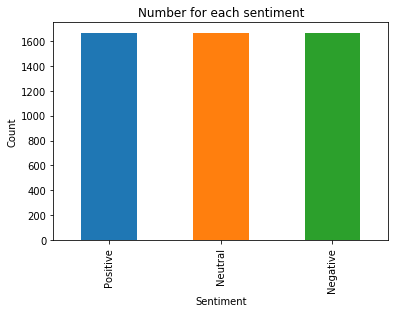

In [19]:
series = test_ds['sentiment'].value_counts()
ax = series.plot(kind='bar', title='Number for each sentiment')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
plt.show()

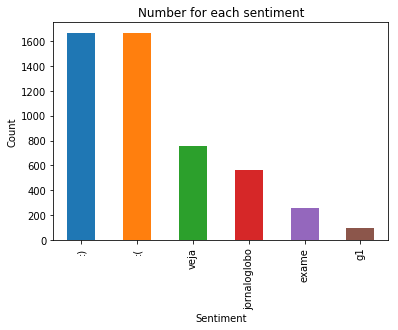

In [20]:
series = test_ds['query_used'].value_counts()
ax = series.plot(kind='bar', title='Number for each sentiment')
ax.set_xlabel('Sentiment')
ax.set_ylabel('Count')
plt.show()

In [21]:
# check data
for i in range(0, 5):
    print(y_test[i], ' => ', X_test[i])

Positive  =>  @Gazo1a Nossa! Muito obrigada :)
Positive  =>  @BerzGamer vai pa puta que te pariu :)
Positive  =>  QUER MAIS DESCONTOS? (14/08) ⭐⭐⭐⭐⭐ 🌐 Confira no link ➔ https://t.co/jhh0Ttlpq3 | » Compartilhe! « Não encontrou a oferta ou cupom que procurava? Não se preocupe ;) criamos uma pagina com mais ofertas e cupons atualizada diariamente :) https://t.co/IgeeD0WmPf
Positive  =>  EU VOU PEGAR VCS, ME AJUDEM GALERA, PELO AMOR DE BUTERA. :) #MMVAs #iHeartRadioMMVAs #FFSingleNoTears https://t.co/ghZMLqRFiV
Positive  =>  Estávamos em casa do Zé e eu estava a morrer de sono, chego a casa e fico sem sono :))))


<h2>Text Preprocessing</h2>

<h4>Planning</h4>
<ul>
  <li>Noise Removal</li>
    <ul>
      <li>Remove urls from text (http(s), www)</li>
      <li>Remove a regex pattern (hashtags, notations)</li>
      <li>Prepare text, replace emoticons ":)) :) :D :(" to positive_emoticon or negative_emoticon or neutral_emoticon tags</li>
    </ul>
  <li>Tokenize text with nltk</li>
  <li>Object Standardization</li>
  <li>Remove stopwords (noise removal and dimensionality reduction)</li>
  <li>Lexicon Normalization</li>
    <ul>
      <li>Lemmatization (not implemented...)</li>
      <li>Stemming (dimensionality reduction)</li>
    </ul>
</ul> 

<h4>Examples of emoticons</h4>

<h4>Noise Removal</h4>

Remove urls from text (http(s), www)

In [22]:
def _remove_url(data):
    ls = []
    words = ''
    regexp1 = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    regexp2 = re.compile('www?.(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    
    for line in data:
        urls = regexp1.findall(line)

        for u in urls:
            line = line.replace(u, ' ')

        urls = regexp2.findall(line)

        for u in urls:
            line = line.replace(u, ' ')
            
        ls.append(line)
    return ls

In [23]:
X_train = _remove_url(X_train)
X_test = _remove_url(X_test)

Remove a regex pattern (hashtags, notations)

In [24]:
def _remove_regex(data, regex_pattern):
    ls = []
    words = ''
    
    for line in data:
        matches = re.finditer(regex_pattern, line)
        
        for m in matches: 
            line = re.sub(m.group().strip(), '', line)

        ls.append(line)

    return ls

In [25]:
# hashtags
regex_pattern = '#[\w]*'
X_train = _remove_regex(X_train, regex_pattern)
X_test = _remove_regex(X_test, regex_pattern)

In [26]:
# notations
regex_pattern = '@[\w]*'
X_train = _remove_regex(X_train, regex_pattern)
X_test = _remove_regex(X_test, regex_pattern)

In [27]:
# check data
for i in range(0, 5):
    print(X_train[i])

 A pessoa certa para isso seria o vale e azevedo :)
 Para mim, é precisamente o contrário :) Vem a chuva e vem a boa disposição :)
Vou fazer um video hoje... estou pensando em falar um pouco sobre o novo meta do CSGO e sobre a pagina   Alguem tem uma sugestao? Queria falar sobre algo do cenario nacional :D
aaaaaaaa amei tanto essas polaroids, nem sei expressar o quanto eu to apaixonada de vdd✨💖🎈🎉🎊 espero que outras pessoas consigam ganhar também :)  
Valoriza o coração do menininho que vc tem. Ele é diferente. O faça sorrir e ter certeza disso ❤️ — Eu valorizo todo mundo na minha vida, não vai ser diferente com ele :))  


Prepare text, replace emoticons ":)) :) :D :(" to positive_emoticon or negative_emoticon or neutral_emoticon

In [28]:
def _replace_emoticons(data, emoticon_list):
    ls = []

    for line in data:
        for exp in emoticon_list:
            line = line.replace(exp, emoticon_list[exp])

        ls.append(line)

    return ls

In [29]:
emoticon_list = {':))': 'positive_emoticon', ':)': 'positive_emoticon', ':D': 'positive_emoticon', ':(': 'negative_emoticon', ':((': 'negative_emoticon', '8)': 'neutral_emoticon'}

In [30]:
X_train = _replace_emoticons(X_train, emoticon_list)
X_test = _replace_emoticons(X_test, emoticon_list)

In [31]:
# check data
for i in range(0, 5):
    print(X_train[i])

 A pessoa certa para isso seria o vale e azevedo positive_emoticon
 Para mim, é precisamente o contrário positive_emoticon Vem a chuva e vem a boa disposição positive_emoticon
Vou fazer um video hoje... estou pensando em falar um pouco sobre o novo meta do CSGO e sobre a pagina   Alguem tem uma sugestao? Queria falar sobre algo do cenario nacional positive_emoticon
aaaaaaaa amei tanto essas polaroids, nem sei expressar o quanto eu to apaixonada de vdd✨💖🎈🎉🎊 espero que outras pessoas consigam ganhar também positive_emoticon  
Valoriza o coração do menininho que vc tem. Ele é diferente. O faça sorrir e ter certeza disso ❤️ — Eu valorizo todo mundo na minha vida, não vai ser diferente com ele positive_emoticon  


<h5 style="color:red;">Note: We can remove or replace with tags some noisy words or special characters like ✨💖🎈🎉🎊❤️, but we need to evaluate if they are important to express some sentiment</h5>

<h4>Tokenize text with nltk</h4>

In [32]:
def _tokenize_text(data):
    ls = []

    for line in data:
        tokens = wordpunct_tokenize(line)
        ls.append(tokens)

    return ls

In [33]:
X_train_tokens = _tokenize_text(X_train)
X_test_tokens = _tokenize_text(X_test)

In [34]:
# check data
for i in range(0, 5):
    print(X_train_tokens[i])

['A', 'pessoa', 'certa', 'para', 'isso', 'seria', 'o', 'vale', 'e', 'azevedo', 'positive_emoticon']
['Para', 'mim', ',', 'é', 'precisamente', 'o', 'contrário', 'positive_emoticon', 'Vem', 'a', 'chuva', 'e', 'vem', 'a', 'boa', 'disposição', 'positive_emoticon']
['Vou', 'fazer', 'um', 'video', 'hoje', '...', 'estou', 'pensando', 'em', 'falar', 'um', 'pouco', 'sobre', 'o', 'novo', 'meta', 'do', 'CSGO', 'e', 'sobre', 'a', 'pagina', 'Alguem', 'tem', 'uma', 'sugestao', '?', 'Queria', 'falar', 'sobre', 'algo', 'do', 'cenario', 'nacional', 'positive_emoticon']
['aaaaaaaa', 'amei', 'tanto', 'essas', 'polaroids', ',', 'nem', 'sei', 'expressar', 'o', 'quanto', 'eu', 'to', 'apaixonada', 'de', 'vdd', '✨💖🎈🎉🎊', 'espero', 'que', 'outras', 'pessoas', 'consigam', 'ganhar', 'também', 'positive_emoticon']
['Valoriza', 'o', 'coração', 'do', 'menininho', 'que', 'vc', 'tem', '.', 'Ele', 'é', 'diferente', '.', 'O', 'faça', 'sorrir', 'e', 'ter', 'certeza', 'disso', '❤️', '—', 'Eu', 'valorizo', 'todo', 'mundo',

<h4>Object Standardization</h4>

In [35]:
def _apply_standardization(tokens, std_list):
    ls = []

    for tk_line in tokens:
        new_tokens = []
        
        for word in tk_line:
            if word.lower() in std_list:
                word = std_list[word.lower()]
                
            new_tokens.append(word) 
            
        ls.append(new_tokens)

    return ls

In [36]:
# create your own list
std_list = {'eh': 'é', 'vc': 'você', 'vcs': 'vocês','tb': 'também', 'tbm': 'também', 'obg': 'obrigado', 'gnt': 'gente', 'q': 'que', 'n': 'não', 'cmg': 'comigo', 'p': 'para', 'ta': 'está', 'to': 'estou', 'vdd': 'verdade'}

In [37]:
# check data
print(X_train[4], X_train[35008])

Valoriza o coração do menininho que vc tem. Ele é diferente. O faça sorrir e ter certeza disso ❤️ — Eu valorizo todo mundo na minha vida, não vai ser diferente com ele positive_emoticon    Infelizmente isso acontece cmg tb.. negative_emoticon


In [38]:
X_train_tokens = _apply_standardization(X_train_tokens, std_list)
X_test_tokens = _apply_standardization(X_test_tokens, std_list)

In [39]:
# check data
print(X_train_tokens[4], X_train_tokens[35008])

['Valoriza', 'o', 'coração', 'do', 'menininho', 'que', 'você', 'tem', '.', 'Ele', 'é', 'diferente', '.', 'O', 'faça', 'sorrir', 'e', 'ter', 'certeza', 'disso', '❤️', '—', 'Eu', 'valorizo', 'todo', 'mundo', 'na', 'minha', 'vida', ',', 'não', 'vai', 'ser', 'diferente', 'com', 'ele', 'positive_emoticon'] ['Infelizmente', 'isso', 'acontece', 'comigo', 'também', '..', 'negative_emoticon']


In [40]:
print(X_test_tokens[0:5])

[['Nossa', '!', 'Muito', 'obrigada', 'positive_emoticon'], ['vai', 'pa', 'puta', 'que', 'te', 'pariu', 'positive_emoticon'], ['QUER', 'MAIS', 'DESCONTOS', '?', '(', '14', '/', '0neutral_emoticon', '⭐⭐⭐⭐⭐', '🌐', 'Confira', 'no', 'link', '➔', '|', '»', 'Compartilhe', '!', '«', 'Não', 'encontrou', 'a', 'oferta', 'ou', 'cupom', 'que', 'procurava', '?', 'Não', 'se', 'preocupe', ';)', 'criamos', 'uma', 'pagina', 'com', 'mais', 'ofertas', 'e', 'cupons', 'atualizada', 'diariamente', 'positive_emoticon'], ['EU', 'VOU', 'PEGAR', 'vocês', ',', 'ME', 'AJUDEM', 'GALERA', ',', 'PELO', 'AMOR', 'DE', 'BUTERA', '.', 'positive_emoticon'], ['Estávamos', 'em', 'casa', 'do', 'Zé', 'e', 'eu', 'estava', 'a', 'morrer', 'de', 'sono', ',', 'chego', 'a', 'casa', 'e', 'fico', 'sem', 'sono', 'positive_emoticon', '))']]


<h4>Remove stopwords (noise removal and dimensionality reduction)</h4>

Remove stopwords

In [41]:
def _remove_stopwords(tokens, stopword_list):
    ls = []

    for tk_line in tokens:
        new_tokens = []
        
        for word in tk_line:
            if word.lower() not in stopword_list:
                new_tokens.append(word) 
            
        ls.append(new_tokens)
        
    return ls

In [42]:
stopword_list = []

In [43]:
# get nltk portuguese stopwords
nltk_stopwords = nltk.corpus.stopwords.words('portuguese')

In [44]:
# You can also add stopwords manually instead of loading from the database. Generally, we add stopwords that belong to this context.
stopword_list.append('é')
stopword_list.append('vou')
stopword_list.append('que')
stopword_list.append('tão')
stopword_list.append('...')
stopword_list.append('«')
stopword_list.append('➔')
stopword_list.append('|')
stopword_list.append('»')
stopword_list.append('uai') # 'expression from the mineiros (MG/Brazil)'

<h5 style="color:red;">Note: Numbers, some punctuations (.,;:) and special characters such as (_- = &%) are not relevant to express some sentiment, they can be considered noisy words. You can treat them here.</h5>
<h5 style="color:red;">noisy_words = ['.', '?', '!', ':', ',', ';', '(', ')', '-']</h5>
<h5 style="color:red;">Note: ? and ! can be important to express sentiment.</h5>

In [45]:
# join all stopwords
stopword_list.extend(nltk_stopwords)


In [46]:
# remove duplicate stopwords (unique list)
stopword_list = list(set(stopword_list))

In [47]:
X_train_tokens = _remove_stopwords(X_train_tokens, stopword_list)
X_test_tokens = _remove_stopwords(X_test_tokens, stopword_list)

In [48]:
# check data
for i in range(0, 5):
    print(X_train_tokens[i])

['pessoa', 'certa', 'vale', 'azevedo', 'positive_emoticon']
['mim', ',', 'precisamente', 'contrário', 'positive_emoticon', 'Vem', 'chuva', 'vem', 'boa', 'disposição', 'positive_emoticon']
['fazer', 'video', 'hoje', 'pensando', 'falar', 'pouco', 'sobre', 'novo', 'meta', 'CSGO', 'sobre', 'pagina', 'Alguem', 'sugestao', '?', 'Queria', 'falar', 'sobre', 'algo', 'cenario', 'nacional', 'positive_emoticon']
['aaaaaaaa', 'amei', 'tanto', 'polaroids', ',', 'sei', 'expressar', 'quanto', 'apaixonada', 'verdade', '✨💖🎈🎉🎊', 'espero', 'outras', 'pessoas', 'consigam', 'ganhar', 'positive_emoticon']
['Valoriza', 'coração', 'menininho', '.', 'diferente', '.', 'faça', 'sorrir', 'ter', 'certeza', 'disso', '❤️', '—', 'valorizo', 'todo', 'mundo', 'vida', ',', 'vai', 'ser', 'diferente', 'positive_emoticon']


<h4>Lexicon Normalization</h4>

Lemmatization (not implemented...)

Stemming (dimensionality reduction)

In [49]:
def _apply_stemmer(tokens):
    ls = []
    stemmer = nltk.stem.RSLPStemmer()

    for tk_line in tokens:
        new_tokens = []
        
        for word in tk_line:
            word = str(stemmer.stem(word))
            new_tokens.append(word) 
            
        ls.append(new_tokens)
        
    return ls

In [50]:
X_train_tokens = _apply_stemmer(X_train_tokens)
X_test_tokens = _apply_stemmer(X_test_tokens)

In [51]:
# check data
for i in range(0, 5):
    print(X_train_tokens[i])

['pesso', 'cert', 'val', 'azeved', 'positive_emoticon']
['mim', ',', 'precis', 'contr', 'positive_emoticon', 'vem', 'chuv', 'vem', 'boa', 'dispos', 'positive_emoticon']
['faz', 'vide', 'hoj', 'pens', 'fal', 'pouc', 'sobr', 'nov', 'met', 'csg', 'sobr', 'pagin', 'algu', 'sugesta', '?', 'quer', 'fal', 'sobr', 'alg', 'cenari', 'nacion', 'positive_emoticon']
['aaaaaaa', 'ame', 'tant', 'polaroid', ',', 'sei', 'express', 'quant', 'apaixon', 'verdad', '✨💖🎈🎉🎊', 'esper', 'outr', 'pesso', 'consig', 'ganh', 'positive_emoticon']
['valoriz', 'coraçã', 'menin', '.', 'difer', '.', 'faç', 'sorr', 'ter', 'cert', 'diss', '❤️', '—', 'valoriz', 'tod', 'mund', 'vid', ',', 'vai', 'ser', 'difer', 'positive_emoticon']


<h2>Exploratory analysis in words</h2>

<h4>Word Cloud</h4>

In [52]:
def _get_text_cloud(tokens):
    text = ''

    for tk_line in tokens:
        new_tokens = []
        
        for word in tk_line:
            text += word + ' '
        
    return text

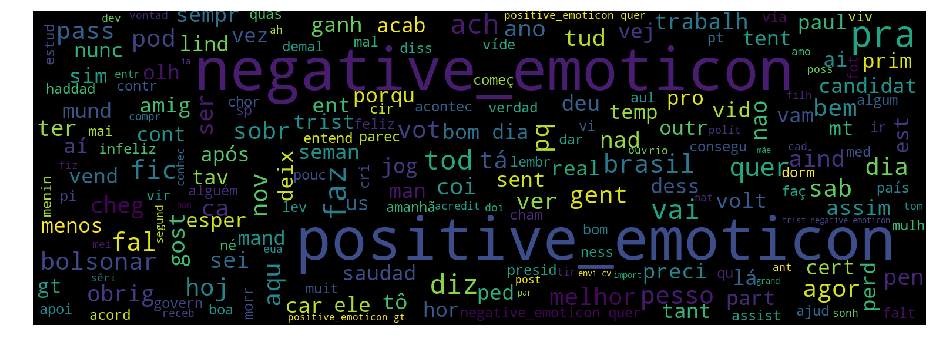

In [53]:
# print train WordCloud
sample_train = random.sample(X_train_tokens, 10000)
text_cloud = _get_text_cloud(sample_train)

word_cloud = WordCloud(max_font_size = 100, width = 1520, height = 535)
word_cloud.generate(text_cloud)
plt.figure(figsize = (16, 9))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

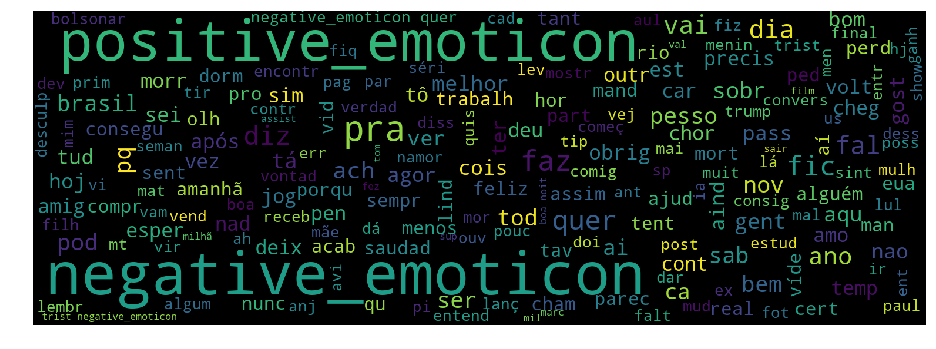

In [54]:
# print test WordCloud
sample_test = random.sample(X_test_tokens, len(X_test_tokens))
text_cloud = _get_text_cloud(sample_test)

word_cloud = WordCloud(max_font_size = 100, width = 1520, height = 535)
word_cloud.generate(text_cloud)
plt.figure(figsize = (16, 9))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

<h4>Frequency Distribution</h4>

In [55]:
def _get_freq_dist_list(tokens):
    ls = []

    for tk_line in tokens:
        for word in tk_line:
            ls.append(word)

    return ls

In [56]:
# Frequency Distribution on training dataset
fd_list = _get_freq_dist_list(X_train_tokens)
fdist = FreqDist(fd_list)
print(fdist)

<FreqDist with 36926 samples and 991981 outcomes>


In [57]:
# most common words
most_common = fdist.most_common(25)
print(most_common)

[(',', 46143), ('negative_emoticon', 33232), ('positive_emoticon', 31038), ('.', 22999), (':', 10575), ('-', 10302), ('!', 8718), ('pra', 7604), ('?', 6638), ('quer', 5631), ('(', 5150), ('dia', 5121), ('faz', 4503), ("'", 4422), (';', 4336), ('vai', 4228), ('"', 3926), ('diz', 3853), ('tod', 3809), ('fic', 3689), ('ser', 3586), ('bolsonar', 3442), ('pod', 3398), ('&', 3249), ('fal', 3207)]


<h5 style="color:red;">Note: Observe that I have not manually added stopwords [, . : - ( ' ; " &] previously in "stopword_list" on purpose,  so to see its efects in this session.</h5>

In [58]:
# most uncommon words (words that appear once)
most_uncommon = fdist.hapaxes()
print(most_uncommon[0:30])

['sugesta', '✨💖🎈🎉🎊', 'ksoaksosk', 'centope', 'carril', 'fotogên', 'monlevad', 'feriad', ':’’)', 'naisuuu', 'eheheheheheh', 'apalp', 'paragraf', 'taxímetr', 'biray', 'ezîz', 'silavên', 'bikim', 'yasmyn', 'cabelooo', 'hextec', 'gontij', 'podiaa', 'piorrr', 'ngb', 'tác', 'armad', 'goe', 'dechav', 'αmig']


In [59]:
# find the word occuring max number of times
fdist.max()

','

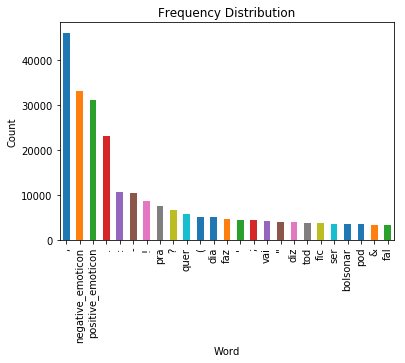

In [60]:
# print most common words
most_common = fdist.most_common(25)
series = pd.Series(data=[v for k, v in most_common], index=[k for k, v in most_common], name='')
ax = series.plot(kind='bar', title='Frequency Distribution')
ax.set_xlabel('Word')
ax.set_ylabel('Count')
plt.show()

Checking how many times word 'brasil' appeared

In [61]:
# number of times
fdist.get('brasil')

2453

In [62]:
# Freq = Number of occurences / total number of words
fdist.freq('brasil') # 2453 / 984823

0.0024728296207286228

<h2>Bag-of-Words</h2>
The bag-of-words model is one of the feature extraction algorithms for text.

<h4>Dataset preparation</h4>
Untokenize text (transform tokenized text into string list)

In [63]:
def _untokenize_text(tokens):
    ls = []

    for tk_line in tokens:
        new_line = ''
        
        for word in tk_line:
            new_line += word + ' '
            
        ls.append(new_line)
        
    return ls

In [64]:
X_train = _untokenize_text(X_train_tokens)
X_test = _untokenize_text(X_test_tokens)

In [65]:
# check data
for i in range(0, 5):
    print(X_train[i])

pesso cert val azeved positive_emoticon 
mim , precis contr positive_emoticon vem chuv vem boa dispos positive_emoticon 
faz vide hoj pens fal pouc sobr nov met csg sobr pagin algu sugesta ? quer fal sobr alg cenari nacion positive_emoticon 
aaaaaaa ame tant polaroid , sei express quant apaixon verdad ✨💖🎈🎉🎊 esper outr pesso consig ganh positive_emoticon 
valoriz coraçã menin . difer . faç sorr ter cert diss ❤️ — valoriz tod mund vid , vai ser difer positive_emoticon 


<h4>Text to Features</h4>
Feature extraction from text
<br/>
Method: bag of words 

In [66]:
# create a count vectorizer object
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)

In [67]:
print(X_train_vect.shape)

(100000, 33647)


In [68]:
print(vectorizer.vocabulary_.get(u'brasil'))

6993


<h4>TF-IDF: Term Frequency - Inverse Document Frequency</h4>
use the transform(...) method to transform count-matrix to a tf-idf representation.

In [69]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_vect)

In [70]:
print(X_train_tfidf.shape)

(100000, 33647)


<h2>Prepare algorithm and run model</h2>

<h4>Training a classifier - MultinomialNB</h4>

In [71]:
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

<h2>Standalone predictions</h2>

<h4>New documents to predict</h4>

In [72]:
new_corpus = [
        '@acme A alegria está na luta, na tentativa, no sofrimento envolvido e não na vitória propriamente dita!', 
        'A alegria evita mil males e prolonga a vida.',
        'não se deve maltratar os idosos, eles possuem muita sabedoria!',
        '#filmedevampiro tome muito cuidado com o dracula... :( www.filmedevampiro.com.br'
        ]

<h4>Preprocessing new corpus</h4>

In [73]:
X_new = new_corpus

In [74]:
# Remove urls from text (http(s), www)
X_new = _remove_url(X_new)

In [75]:
# Remove hashtags
regex_pattern = '#[\w]*'
X_new = _remove_regex(X_new, regex_pattern)

In [76]:
# Remove notations
regex_pattern = '@[\w]*'
X_new = _remove_regex(X_new, regex_pattern)

In [77]:
# Replace emoticons ":)) :) :D :(" to positive_emoticon or negative_emoticon or neutral_emoticon
X_new = _replace_emoticons(X_new, emoticon_list)

In [78]:
# Tokenize text
X_new_tokens = _tokenize_text(X_new)

In [79]:
# Object Standardization
X_new_tokens = _apply_standardization(X_new_tokens, std_list)

In [80]:
# remove stopwords
X_new_tokens = _remove_stopwords(X_new_tokens, stopword_list)

<h4>Lexicon Normalization</h4>

In [81]:
# Lemmatization (not implemented...)

In [82]:
# Stemming (dimensionality reduction)
X_new_tokens = _apply_stemmer(X_new_tokens)

<h4>Bag-of-Words</h4>
The bag-of-words model is one of the feature extraction algorithms for text.

In [83]:
# Dataset preparation
# Untokenize text (transform tokenized text into string list)
X_new = _untokenize_text(X_new_tokens)

In [84]:
# Text to Features
# Feature extraction from text 
# Method: bag of words
X_new_vect = vectorizer.transform(X_new)

In [85]:
print(X_new_vect.shape)

(4, 33647)


In [86]:
print(vectorizer.vocabulary_.get(u'idos'))
print(vectorizer.vocabulary_.get(u'alegr'))

17095
3929


In [87]:
# TF-IDF: Term Frequency - Inverse Document Frequency
# use the transform(...) method to transform count-matrix to a tf-idf representation.
X_new_tfidf = tfidf_transformer.transform(X_new_vect)

In [88]:
print(X_new_tfidf.shape)

(4, 33647)


<h4>Make predictions on new_corpus</h4>

In [89]:
standalone_predictions = model.predict(X_new_tfidf)

In [90]:
for doc, prediction in zip(new_corpus, standalone_predictions):
    print('%r => %s' % (doc, prediction))

'@acme A alegria está na luta, na tentativa, no sofrimento envolvido e não na vitória propriamente dita!' => Positive
'A alegria evita mil males e prolonga a vida.' => Neutral
'não se deve maltratar os idosos, eles possuem muita sabedoria!' => Neutral
'#filmedevampiro tome muito cuidado com o dracula... :( www.filmedevampiro.com.br' => Negative


<h2>Evaluate the model</h2>

In [91]:
def _get_accuracy(matrix):
    acc = 0
    n = 0
    total = 0
    
    for i in range(0, len(matrix)):
        for j in range(0, len(matrix)):
            if(i == j): 
                n += matrix[i,j]
            
            total += matrix[i,j]
            
    acc = n / total
    return acc

<h4>Bag-of-Words</h4>
The bag-of-words model is one of the feature extraction algorithms for text.

In [92]:
# Text to Features
# Feature extraction from text 
# Method: bag of words
X_test_vect = vectorizer.transform(X_test)
print(X_test_vect.shape)

(4999, 33647)


In [93]:
# TF-IDF: Term Frequency - Inverse Document Frequency
# use the transform(...) method to transform count-matrix to a tf-idf representation.
X_test_tfidf = tfidf_transformer.transform(X_test_vect)
print(X_test_tfidf.shape)

(4999, 33647)


<h4>Make predictions on validation dataset</h4>

In [94]:
predictions = model.predict(X_test_tfidf)

<h4>Analyze results</h4>

In [95]:
matrix = metrics.confusion_matrix(y_test, predictions)
print(matrix)

[[1541   18  107]
 [  21 1594   51]
 [ 122   48 1497]]


In [96]:
print(model.classes_)

['Negative' 'Neutral' 'Positive']


In [97]:
acc1 = np.mean(predictions == y_test)
acc2 = _get_accuracy(matrix)
print(acc1, acc2)

0.9265853170634126 0.9265853170634126


In [98]:
for doc, prediction, y in zip(X_test[0:10], predictions[0:10], y_test[0:10]):
    print('%r => %s [%s]' % (doc, prediction, y))

'! obrig positive_emoticon ' => Positive [Positive]
'vai pa put par positive_emoticon ' => Positive [Positive]
'qu descont ? ( 14 / 0neutral_emoticon ⭐⭐⭐⭐⭐ 🌐 conf link compartilh ! encontr ofert cupom procur ? preocup ;) cri pagin ofert cupom atual di positive_emoticon ' => Positive [Positive]
'peg , ajud gal , am but . positive_emoticon ' => Positive [Positive]
'cas zé morr son , cheg cas fic son positive_emoticon )) ' => Positive [Positive]
'precis positive_emoticon ' => Positive [Positive]
'acas ador beij abraç hahahahah bue fofii ahahah altur agor gost positive_emoticon ' => Positive [Positive]
'solt s so sempr positive_emoticon ' => Positive [Positive]
'lind cort kit mári coleç bia cravol cadastr sit , esper pod ir adquir arras encomend , afinal tem moment positive_emoticon ' => Positive [Positive]
'clar sim positive_emoticon ' => Positive [Positive]


In [99]:
# performance analysis of the results
print(metrics.classification_report(y_test, predictions, target_names=model.classes_))

              precision    recall  f1-score   support

    Negative       0.92      0.92      0.92      1666
     Neutral       0.96      0.96      0.96      1666
    Positive       0.90      0.90      0.90      1667

    accuracy                           0.93      4999
   macro avg       0.93      0.93      0.93      4999
weighted avg       0.93      0.93      0.93      4999



<h2>Building a pipeline MultinomialNB</h2>
In order to make the vectorizer => transformer => classifier easier to work with, scikit-learn provides a Pipeline class that behaves like a compound classifier:

In [100]:
model_MNB = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB()),
])

The names vect, tfidf and clf (classifier) are arbitrary. We will use them to perform grid search for suitable hyperparameters below. We can now train the model with a single command:

In [101]:
model_MNB.fit(X_train, y_train)
predictions_MNB = model_MNB.predict(X_test)

In [102]:
matrix = metrics.confusion_matrix(y_test, predictions_MNB)
acc = _get_accuracy(matrix)
print(acc)

0.9265853170634126


<h2>Building a pipeline SGDClassifier, a linear support vector machine (SVM)</h2>

In [103]:
model_SGD = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(loss = 'hinge', penalty = 'l2', alpha = 1e-3, random_state = 42, max_iter = 5, tol = None)),
])

In [104]:
model_SGD.fit(X_train, y_train)
predictions_SGD = model_SGD.predict(X_test)

In [105]:
matrix = metrics.confusion_matrix(y_test, predictions_SGD)
acc = _get_accuracy(matrix)
print(acc)

0.9585917183436687


<h2>Parameter tuning using grid search SGDClassifier</h2>

Instead of tweaking the parameters of the various components of the chain, it is possible to run an exhaustive search of the best parameters on a grid of possible values

In [106]:
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
    'tfidf__use_idf': (True, False),
    'clf__alpha': (1e-2, 1e-3),
}

In [107]:
gs_model_SGD = GridSearchCV(model_SGD, parameters, cv = 5, iid = False, n_jobs = -1)
gs_model_SGD = gs_model_SGD.fit(X_train, y_train)

/Users/ruideoliveira/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning


In [108]:
gs_predictions_SGD = gs_model_SGD.predict(['alegr lut tent sofr envolv não vit propri dit.'])
print(gs_predictions_SGD)

['Neutral']


In [109]:
X_new

['alegr lut , tent , sofr envolv vitór propr dit ! ',
 'alegr evit mil mal prolong vid . ',
 'dev maltrat idos , possu muit sabed ! ',
 'tom cuid dracul negative_emoticon ']

In [110]:
gs_predictions_SGD = gs_model_SGD.predict(X_new)
print(gs_predictions_SGD)

['Neutral' 'Neutral' 'Neutral' 'Negative']


In [111]:
print(gs_model_SGD.best_score_)

0.96359


In [112]:
print(gs_model_SGD.best_params_)

{'clf__alpha': 0.001, 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}


In [113]:
for param_name in sorted(parameters.keys()):
    print("%s: %r" % (param_name, gs_model_SGD.best_params_[param_name]))

clf__alpha: 0.001
tfidf__use_idf: False
vect__ngram_range: (1, 2)


<h2>Evaluating other models</h2>
Logistic Regression
<br/>
Support Vector Machine (SVM)
<br/>
Random Forest
<br/>
Gradient Boosting Model

<h2>Implementing a Linear Classifier (Logistic Regression)</h2>

In [114]:
model_LR = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')),
])

In [115]:
model_LR.fit(X_train, y_train)
predictions_LR = model_LR.predict(X_test)

/Users/ruideoliveira/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [116]:
matrix = metrics.confusion_matrix(y_test, predictions_LR)
acc = _get_accuracy(matrix)
print(acc)

0.9695939187837568


<h2>Implementing a Support Vector Machine (SVM) Model</h2>

In [117]:
'''
model_SVC = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SVC()),
])
'''

"\nmodel_SVC = Pipeline([\n    ('vect', CountVectorizer()),\n    ('tfidf', TfidfTransformer()),\n    ('clf', SVC()),\n])\n"

In [118]:
'''
model_SVC.fit(X_train, y_train)
predictions_SVC = model_SVC.predict(X_test)
'''

'\nmodel_SVC.fit(X_train, y_train)\npredictions_SVC = model_SVC.predict(X_test)\n'

In [115]:
'''
matrix = metrics.confusion_matrix(y_test, predictions_SVC)
acc = _get_accuracy(matrix)
print(acc)
'''

'\nmatrix = metrics.confusion_matrix(y_test, predictions_SVC)\nacc = _get_accuracy(matrix)\nprint(acc)\n'

<h2>Implementing a Random Forest Model</h2>

In [116]:
'''
model_RF = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', RandomForestClassifier()),
])
'''

"\nmodel_RF = Pipeline([\n    ('vect', CountVectorizer()),\n    ('tfidf', TfidfTransformer()),\n    ('clf', RandomForestClassifier()),\n])\n"

In [117]:
'''
model_RF.fit(X_train, y_train)
predictions_RF = model_RF.predict(X_test)
'''

'\nmodel_RF.fit(X_train, y_train)\npredictions_RF = model_RF.predict(X_test)\n'

In [118]:
'''
matrix = metrics.confusion_matrix(y_test, predictions_RF)
acc = _get_accuracy(matrix)
print(acc)
'''

'\nmatrix = metrics.confusion_matrix(y_test, predictions_RF)\nacc = _get_accuracy(matrix)\nprint(acc)\n'

<h2>Implementing Gradient Boosting Model</h2>

In [119]:
'''
model_GB = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', GradientBoostingClassifier()),
])
'''

"\nmodel_GB = Pipeline([\n    ('vect', CountVectorizer()),\n    ('tfidf', TfidfTransformer()),\n    ('clf', GradientBoostingClassifier()),\n])\n"

In [120]:
'''
model_GB.fit(X_train, y_train)
predictions_GB = model_GB.predict(X_test)
'''

'\nmodel_GB.fit(X_train, y_train)\npredictions_GB = model_GB.predict(X_test)\n'

In [121]:
'''
matrix = metrics.confusion_matrix(y_test, predictions_GB)
acc = _get_accuracy(matrix)
print(acc)
'''

'\nmatrix = metrics.confusion_matrix(y_test, predictions_GB)\nacc = _get_accuracy(matrix)\nprint(acc)\n'

<h2>Implementing Neural Networks (not implemented...)</h2>
continue in other kernels...

### Sentiment of Political Tweets

In [146]:
import json

# read in JB and LL data from json files
with open('JBjson.txt') as json_file:
    JBdata = json.load(json_file)
    
with open('LLjson.txt') as json_file: 
    LLdata = json.load(json_file)  
    
rightist_pols = ["GeneralMourao", "FlavioBolsonaro", "TerezaCrisMS", "onyxlorenzoni", 
                "PauloGuedesMin", "AbrahamWeint", "soudaniella111", "majorolimpio", "SorayaThronicke"]

leftist_pols = ["senadorhumberto", "elizianegama", "senadorjpprates", "dilmabr", "senadorpaulor", 
                "jaqueswagner", "paulopaim", "gleisi", "FlavioDino"]

In [147]:
JBdf = pd.DataFrame(JBdata)
LLdf = pd.DataFrame(LLdata)

In [148]:
rightist_df = JBdf
leftist_df = LLdf

# read data for other politicians
for politician in rightist_pols:
    with open(politician+'json.txt') as json_file:
        data = json.load(json_file)
        df = pd.DataFrame(data)
        # concatenate df to main dataframe
        rightist_df = pd.concat([rightist_df, df], ignore_index=True)
        
for politician in leftist_pols:
    with open(politician+'json.txt') as json_file:
        data = json.load(json_file)
        df = pd.DataFrame(data)
        # concatenate df to main dataframe
        leftist_df = pd.concat([leftist_df, df], ignore_index=True)

In [149]:
len(rightist_df)

26712

In [150]:
len(leftist_df)

32131

In [126]:
print(leftist_df.loc[16601,"text"])

O caso é complexo, mas o trâmite foi extremamente ágil. Foram rápidos, na verdade, em mais uma clara perseguição po… https://t.co/WyhDE4DMYY


In [127]:
leftist_df.sample(3)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
24846,None,None,Wed Mar 15 15:11:32 +0000 2017,"{'hashtags': [{'text': 'GovernoFederal', 'indi...",NaN,79,False,None,842030509488263173,842030509488263173,...,NaN,NaN,NaN,31,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Solicitei ao @MichelTemer informações sobre os...,False,"{'id': 37122131, 'id_str': '37122131', 'name':..."
6102,None,None,Tue Aug 20 16:06:47 +0000 2019,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,158,False,None,1163844840733499393,1163844840733499393,...,NaN,NaN,NaN,58,False,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",A Lava Jato descobriu rolos na empresa de Paul...,True,"{'id': 76049312, 'id_str': '76049312', 'name':..."
29103,None,None,Tue Mar 31 12:46:52 +0000 2020,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,1297,False,None,1244969411146141696,1244969411146141696,...,NaN,NaN,NaN,138,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...","Em várias cidades do Maranhão, os bombeiros es...",True,"{'id': 25577585, 'id_str': '25577585', 'name':..."


In [136]:
def _replace_emoticons(data, emoticon_list):
    ls = []

    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    for line in data:
        for exp in emoticon_list:
            line = line.replace(exp, emoticon_list[exp])
         
        emojis = emoji_pattern.findall(line)
        for exp in emojis:
            line = line.replace(exp, ' ')

        ls.append(line)

    return ls

In [151]:
right_sentiment = []

for i in range(len(rightist_df)):
    tweet_info = []
    tweet_info.append(rightist_df.loc[i, "user"]["id"])
    tweet_info.append(rightist_df.loc[i, "id"])
    tweet_info.append(rightist_df.loc[i, "text"])
    right_sentiment.append(tweet_info)
    
left_sentiment = []
for i in range(len(leftist_df)):
    tweet_info = []
    tweet_info.append(leftist_df.loc[i, "user"]["id"])
    tweet_info.append(leftist_df.loc[i, "id"])
    tweet_info.append(leftist_df.loc[i, "text"])
    left_sentiment.append(tweet_info)   

In [152]:
rightSent_df = pd.DataFrame(right_sentiment, columns = ['user_id','tweet_id','tweet_text'])
leftSent_df = pd.DataFrame(left_sentiment, columns = ['user_id','tweet_id','tweet_text'])

In [135]:
rightSent_df.head()

,user_id,tweet_id,tweet_text
0,128372940,1249833606341591041,Para dar mais agilidade às necessidades urgent...
1,128372940,1249833048205647874,O @govbr regularizou mais de 90.000 CPFs para ...
2,128372940,1249735782572556290,- Pulverização aérea/Vale do Ribeira/bananicul...
3,128372940,1249706574135865344,@AMendoncaAGU 🇧🇷
4,128372940,1249665496087236609,- Os membros da Comissão de Relações Econômica...


In [153]:
rightSent_df = rightSent_df.rename(columns={'text': 'tweet_text'})

In [154]:
rightSent_df['tweet_text'] = _remove_url(rightSent_df['tweet_text'])

In [155]:
regex_pattern = '#[\w]*'
rightSent_df['tweet_text'] = _remove_regex(rightSent_df['tweet_text'], regex_pattern)

In [156]:
regex_pattern = '@[\w]*'
rightSent_df['tweet_text'] = _remove_regex(rightSent_df['tweet_text'], regex_pattern)

In [157]:
rightSent_df['tweet_text'] = _replace_emoticons(rightSent_df['tweet_text'], emoticon_list)

In [158]:
rightSent_df['tweet_text'] = _tokenize_text(rightSent_df['tweet_text'])

In [159]:
rightSent_df['tweet_text'] = _apply_standardization(rightSent_df['tweet_text'], std_list)

In [160]:
rightSent_df['tweet_text'] = _remove_stopwords(rightSent_df['tweet_text'], stopword_list)

In [161]:
rightSent_df['tweet_text'] = _apply_stemmer(rightSent_df['tweet_text'])

In [162]:
rightSent_df['tweet_text'] = _untokenize_text(rightSent_df['tweet_text'])

In [163]:
rightSent_vect = vectorizer.transform(rightSent_df['tweet_text'])

In [164]:
rightSent_tfidf = tfidf_transformer.transform(rightSent_vect)

In [165]:
rightSent_pred =  model.predict(rightSent_tfidf)

In [166]:
print(rightSent_pred[0:10])

['Neutral' 'Neutral' 'Neutral' 'Positive' 'Neutral' 'Neutral' 'Negative'
 'Positive' 'Neutral' 'Neutral']


In [167]:
leftSent_df = leftSent_df.rename(columns={'text': 'tweet_text'})
# text preprocessing
leftSent_df['tweet_text'] = _remove_url(leftSent_df['tweet_text'])
regex_pattern = '#[\w]*'
leftSent_df['tweet_text'] = _remove_regex(leftSent_df['tweet_text'], regex_pattern)
regex_pattern = '@[\w]*'
leftSent_df['tweet_text'] = _remove_regex(leftSent_df['tweet_text'], regex_pattern)
leftSent_df['tweet_text'] = _replace_emoticons(leftSent_df['tweet_text'], emoticon_list)

leftSent_df['tweet_text'] = _tokenize_text(leftSent_df['tweet_text'])
leftSent_df['tweet_text'] = _apply_standardization(leftSent_df['tweet_text'], std_list)
leftSent_df['tweet_text'] = _remove_stopwords(leftSent_df['tweet_text'], stopword_list)
leftSent_df['tweet_text'] = _apply_stemmer(leftSent_df['tweet_text'])
leftSent_df['tweet_text'] = _untokenize_text(leftSent_df['tweet_text'])

leftSent_vect = vectorizer.transform(leftSent_df['tweet_text'])
leftSent_tfidf = tfidf_transformer.transform(leftSent_vect)



In [168]:
leftSent_pred =  model.predict(leftSent_tfidf)

In [280]:
print(leftSent_pred[0:10])

['Negative' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Neutral' 'Positive'
 'Positive' 'Positive' 'Positive']


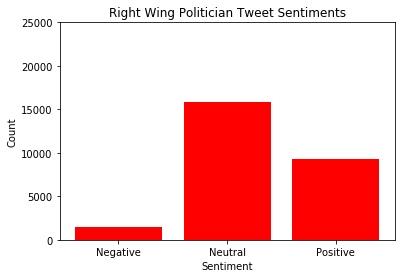

In [170]:
import numpy
import matplotlib.pyplot as plot

unique, counts = numpy.unique(rightSent_pred, return_counts=True)
right_sent = dict(zip(unique, counts))
keys = right_sent.keys()
values = right_sent.values()
plot.bar(keys, values, color = ['red','red','red'])
plot.title('Right Wing Politician Tweet Sentiments')
plot.xlabel('Sentiment')
plot.ylabel('Count')
plot.ylim(bottom = 0, top = 25000)
plot.savefig('rightsentiment.png')

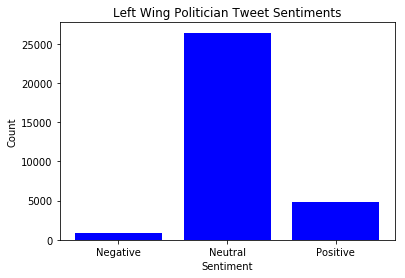

In [172]:
unique, counts = numpy.unique(leftSent_pred, return_counts=True)
left_sent = dict(zip(unique, counts))
keys = left_sent.keys()
values = left_sent.values()
plot.bar(keys, values, color = ['blue','blue','blue'])
plot.title('Left Wing Politician Tweet Sentiments')
plot.xlabel('Sentiment')
plot.ylabel('Count')

plot.savefig('leftsentiment.png')

In [176]:
print(right_sent)

{'Negative': 1521, 'Neutral': 15898, 'Positive': 9293}


### Mean and Standard Dev

In [188]:
import math
# neg = 0, neutral = 0.5, pos = 1
tot_tweets = sum(right_sent.values())
right_mean = ((right_sent['Neutral']*0.5) + (right_sent['Positive']*1)) / tot_tweets
right_std = ((right_sent['Negative']*math.pow((0-right_mean),2)) + 
            (right_sent['Neutral']*math.pow((0.5-right_mean),2)) +
            (right_sent['Positive']*math.pow((1-right_mean),2))) / (tot_tweets - 1)

print(right_mean)  
print(right_std)

0.6454776879305181
0.08004843340578814


In [189]:
tot_tweets = sum(left_sent.values())
left_mean = ((left_sent['Neutral']*0.5) + (left_sent['Positive']*1)) / tot_tweets
left_std = ((left_sent['Negative']*math.pow((0-left_mean),2)) + 
            (left_sent['Neutral']*math.pow((0.5-left_mean),2)) +
            (left_sent['Positive']*math.pow((1-left_mean),2))) / (tot_tweets - 1)
print(left_mean) 
print(left_std)

0.5624474806261865
0.040645786807455855


In [193]:
rightist_df.head()

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user,politics
0,None,None,Mon Apr 13 22:55:27 +0000 2020,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,14496,False,None,1249833606341591041,1249833606341591041,...,NaN,NaN,2168,False,NaN,"<a href=""http://twitter.com/download/android"" ...",Para dar mais agilidade às necessidades urgent...,True,"{'id': 128372940, 'id_str': '128372940', 'name...",right
1,None,None,Mon Apr 13 22:53:14 +0000 2020,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,29539,False,None,1249833048205647874,1249833048205647874,...,NaN,NaN,5149,False,NaN,"<a href=""http://twitter.com/download/android"" ...",O @govbr regularizou mais de 90.000 CPFs para ...,True,"{'id': 128372940, 'id_str': '128372940', 'name...",right
2,None,None,Mon Apr 13 16:26:44 +0000 2020,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,17623,False,None,1249735782572556290,1249735782572556290,...,NaN,NaN,3328,False,NaN,"<a href=""http://twitter.com/download/android"" ...",- Pulverização aérea/Vale do Ribeira/bananicul...,True,"{'id': 128372940, 'id_str': '128372940', 'name...",right
3,None,None,Mon Apr 13 14:30:40 +0000 2020,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,7505,False,None,1249706574135865344,1249706574135865344,...,NaN,NaN,601,False,NaN,"<a href=""http://twitter.com/download/android"" ...",@AMendoncaAGU 🇧🇷,False,"{'id': 128372940, 'id_str': '128372940', 'name...",right
4,None,None,Mon Apr 13 11:47:26 +0000 2020,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,18836,False,None,1249665496087236609,1249665496087236609,...,NaN,NaN,2959,False,NaN,"<a href=""http://twitter.com/download/android"" ...",- Os membros da Comissão de Relações Econômica...,True,"{'id': 128372940, 'id_str': '128372940', 'name...",right


In [181]:
# assign new column that indicate political stance
rightist_df['politics'] = 'right'
leftist_df['politics'] = 'left'

In [182]:
right_model = rightist_df[['id','text','user','politics']]
left_model = leftist_df[['id','text','user','politics']]

In [183]:
len(left_model)

32131

In [192]:
from sklearn.model_selection import train_test_split
# splitting testing and training data
X_right = right_model['text']
X_left = left_model['text']



Y_right = right_model['politics']
Y_left = left_model['politics']

Y = pd.concat([Y_right,Y_left], ignore_index=True)

X_right_train, X_right_test, Y_right_train, Y_right_test = train_test_split( X_right, Y_right, 
                                                                            test_size=0.2, random_state=0)
    
X_left_train, X_left_test, Y_left_train, Y_left_test = train_test_split( X_left, Y_left, 
                                                                        test_size=0.2, random_state=0)
    
X_train = pd.concat([X_right_train,X_left_train], ignore_index=True)
X_test = pd.concat([X_right_test,X_left_test], ignore_index=True)
Y_train = pd.concat([Y_right_train,Y_left_train], ignore_index=True)
Y_test = pd.concat([Y_right_test,Y_left_test], ignore_index=True)

In [190]:
# bag-of-words method
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_vect)


pol_model = MultinomialNB()
pol_model.fit(X_train_tfidf, Y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [243]:
X_test_vect = vectorizer.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_vect)

predictions_80 = pol_model.predict(X_test_tfidf)
Y_test_80 = Y_test

In [256]:
matrix_80 = metrics.confusion_matrix(Y_test, predictions_80)
print(matrix_80)
print(predictions_80[0:5])

[[6212  215]
 [1962 3381]]
['right' 'left' 'left' 'right' 'right']


In [246]:
acc_80 = np.mean(predictions_80 == Y_test)
print(acc_20,acc_40,acc_60,acc_80)

0.754753053637812 0.7830741779250574 0.8052085988614156 0.8150382327952421


In [248]:
print(matrix_20)
print(matrix_40)
print(matrix_60)
print(matrix_80)

[[24818   887]
 [10658 10712]]
[[18653   626]
 [ 7033  8995]]
[[12439   414]
 [ 4171  6514]]
[[6212  215]
 [1962 3381]]


In [225]:
np.savetxt('predictions_20.csv',predictions_20, delimiter = ',',fmt='%s')

In [249]:
print(len(predictions_20))
print(len(Y_test_20))

47075
47075


In [254]:
TP = 0
TN = 0
FP = 0
FN = 0
for i in range(0,len(predictions_20)):
    if predictions_20[i] == 'right':
        if Y_test_20[i] == 'right':
            TP += 1
        else:
            FP += 1
    else:
        if Y_test_20[i] == 'right':
            FN += 1
        else:
            TN += 1
    

In [255]:
print(TP,FN,FP,TN)

10712 10658 887 24818


# Hashtag Portion

In [119]:
# read in tweets
# remove retweets
# preprocess text
# vectorize text
# get sentiment data
# train political model --> could train with or without rt's

In [120]:
left_hash_df_RT = pd.read_pickle("left_hashtags")
right_hash_df_RT = pd.read_pickle("right_hashtags")

In [121]:
print(len(left_hash_df_RT))

16949


In [122]:
left_hash_df = left_hash_df_RT[~left_hash_df_RT.text.str.startswith('RT')]

In [123]:
print(len(left_hash_df))

9955


In [124]:
print(len(right_hash_df_RT))
right_hash_df = right_hash_df_RT[~right_hash_df_RT.text.str.startswith('RT')]
print(len(right_hash_df))

22193
13158


In [135]:
# text preprocessing
left_hash_df = left_hash_df.rename(columns={'text': 'tweet_text'})
# text preprocessing
left_hash_df['tweet_text'] = _remove_url(left_hash_df['tweet_text'])
regex_pattern = '#[\w]*'
left_hash_df['tweet_text'] = _remove_regex(left_hash_df['tweet_text'], regex_pattern)
regex_pattern = '@[\w]*'
left_hash_df['tweet_text'] = _remove_regex(left_hash_df['tweet_text'], regex_pattern)
left_hash_df['tweet_text'] = _replace_emoticons(left_hash_df['tweet_text'], emoticon_list)

left_hash_df['tweet_text'] = _tokenize_text(left_hash_df['tweet_text'])
left_hash_df['tweet_text'] = _apply_standardization(left_hash_df['tweet_text'], std_list)
left_hash_df['tweet_text'] = _remove_stopwords(left_hash_df['tweet_text'], stopword_list)
left_hash_df['tweet_text'] = _apply_stemmer(left_hash_df['tweet_text'])
left_hash_df['tweet_text'] = _untokenize_text(left_hash_df['tweet_text'])



In [136]:
right_hash_df = right_hash_df.rename(columns={'text': 'tweet_text'})
# text preprocessing
right_hash_df['tweet_text'] = _remove_url(right_hash_df['tweet_text'])
regex_pattern = '#[\w]*'
right_hash_df['tweet_text'] = _remove_regex(right_hash_df['tweet_text'], regex_pattern)
regex_pattern = '@[\w]*'
right_hash_df['tweet_text'] = _remove_regex(right_hash_df['tweet_text'], regex_pattern)
right_hash_df['tweet_text'] = _replace_emoticons(right_hash_df['tweet_text'], emoticon_list)

right_hash_df['tweet_text'] = _tokenize_text(right_hash_df['tweet_text'])
right_hash_df['tweet_text'] = _apply_standardization(right_hash_df['tweet_text'], std_list)
right_hash_df['tweet_text'] = _remove_stopwords(right_hash_df['tweet_text'], stopword_list)
right_hash_df['tweet_text'] = _apply_stemmer(right_hash_df['tweet_text'])
right_hash_df['tweet_text'] = _untokenize_text(right_hash_df['tweet_text'])



In [138]:
# Frequency Distribution on training dataset
left_hash_tokens = _tokenize_text(left_hash_df['tweet_text'])
fd_list = _get_freq_dist_list(left_hash_tokens)
fdist = FreqDist(fd_list)

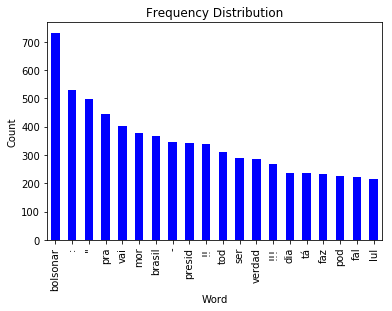

<Figure size 432x288 with 0 Axes>

In [139]:
most_common = fdist.most_common(25)
most_common = most_common[5:25]
series = pd.Series(data=[v for k, v in most_common], index=[k for k, v in most_common], name='')
ax = series.plot(kind='bar', title='Frequency Distribution', color = ['blue'])
ax.set_xlabel('Word')
ax.set_ylabel('Count')
plt.show()
plt.savefig('left_hash_wordfreq')

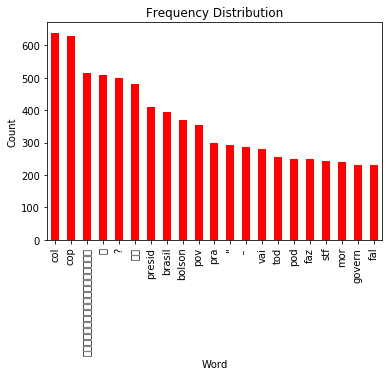

<Figure size 432x288 with 0 Axes>

In [140]:
# Frequency Distribution on training dataset
right_hash_tokens = _tokenize_text(right_hash_df['tweet_text'])
fd_list = _get_freq_dist_list(right_hash_tokens)
fdist = FreqDist(fd_list)

most_common = fdist.most_common(25)
most_common = most_common[4:25]
series = pd.Series(data=[v for k, v in most_common], index=[k for k, v in most_common], name='')
ax = series.plot(kind='bar', title='Frequency Distribution', color = ['red'])
ax.set_xlabel('Word')
ax.set_ylabel('Count')
plt.show()
plt.savefig('right_hash_wordfreq')

In [141]:
from sklearn.model_selection import train_test_split
# splitting testing and training data
X_right_hash = right_hash_df['tweet_text']
X_left_hash = left_hash_df['tweet_text']

right_hash_df['politics'] = 'right'
left_hash_df['politics'] = 'left'

Y_right_hash = right_hash_df['politics']
Y_left_hash = left_hash_df['politics']

Y_hash = pd.concat([Y_right_hash,Y_left_hash], ignore_index=True)

X_right_hash_train, X_right_hash_test, Y_right_hash_train, Y_right_hash_test = train_test_split( X_right_hash, Y_right_hash, 
                                                                            test_size=0.2, random_state=0)
    
X_left_hash_train, X_left_hash_test, Y_left_hash_train, Y_left_hash_test = train_test_split( X_left_hash, Y_left_hash, 
                                                                        test_size=0.2, random_state=0)

print(len(X_right_hash_train))
print(len(X_left_hash_train))
X_hash_train = pd.concat([X_right_hash_train,X_left_hash_train], ignore_index=True)
X_hash_test = pd.concat([X_right_hash_test,X_left_hash_test], ignore_index=True)
Y_hash_train = pd.concat([Y_right_hash_train,Y_left_hash_train], ignore_index=True)
Y_hash_test = pd.concat([Y_right_hash_test,Y_left_hash_test], ignore_index=True)

#vectorizer = CountVectorizer()
#X_hash_train_vect = vectorizer.transform(X_hash_train)
#tfidf_transformer = TfidfTransformer()
#X_hash_train_tfidf = tfidf_transformer.fit_transform(X_hash_train_vect)

10526
7964


In [142]:
# sent analyzer
right_hash_sent_vect = vectorizer.transform(X_right_hash)
right_hash_sent_tfidf = tfidf_transformer.transform(right_hash_sent_vect)
right_hash_sent_pred = model.predict(right_hash_sent_tfidf)

In [144]:
print(right_hash_sent_pred[0:10])

['Positive' 'Neutral' 'Neutral' 'Neutral' 'Positive' 'Negative' 'Positive'
 'Positive' 'Positive' 'Positive']


In [145]:
# sent analyzer
left_hash_sent_vect = vectorizer.transform(X_left_hash)
left_hash_sent_tfidf = tfidf_transformer.transform(left_hash_sent_vect)
left_hash_sent_pred = model.predict(left_hash_sent_tfidf)

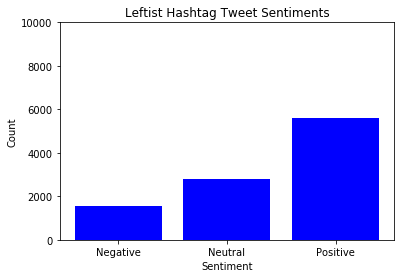

In [175]:
unique, counts = numpy.unique(left_hash_sent_pred, return_counts=True)
left_hash_sent = dict(zip(unique, counts))
keys = left_hash_sent.keys()
values = left_hash_sent.values()
plot.bar(keys, values, color = ['blue','blue','blue'])
plot.title('Leftist Hashtag Tweet Sentiments')
plot.xlabel('Sentiment')
plot.ylabel('Count')
plot.ylim(bottom = 0, top = 10000)
plot.savefig('left_hash_sentiment.png')

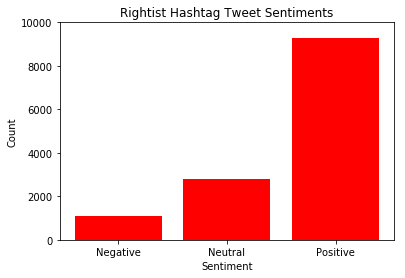

In [177]:
unique, counts = numpy.unique(right_hash_sent_pred, return_counts=True)
right_hash_sent = dict(zip(unique, counts))
keys = right_hash_sent.keys()
values = right_hash_sent.values()
plot.bar(keys, values, color = ['red','red','red'])
plot.title('Rightist Hashtag Tweet Sentiments')
plot.xlabel('Sentiment')
plot.ylabel('Count')
plot.ylim(bottom = 0, top = 10000)
plot.savefig('right_hash_sentiment.png')

In [178]:
import math
# neg = 0, neutral = 0.5, pos = 1
tot_tweets = sum(right_hash_sent.values())
right_mean = ((right_hash_sent['Neutral']*0.5) + (right_hash_sent['Positive']*1)) / tot_tweets
right_std = ((right_hash_sent['Negative']*math.pow((0-right_mean),2)) + 
            (right_hash_sent['Neutral']*math.pow((0.5-right_mean),2)) +
            (right_hash_sent['Positive']*math.pow((1-right_mean),2))) / (tot_tweets - 1)

print(right_mean)  
print(right_std) 

0.8114835081319349
0.09969102697585046


In [179]:
# neg = 0, neutral = 0.5, pos = 1
tot_tweets = sum(left_hash_sent.values())
left_mean = ((left_hash_sent['Neutral']*0.5) + (left_hash_sent['Positive']*1)) / tot_tweets
left_std = ((left_hash_sent['Negative']*math.pow((0-left_mean),2)) + 
            (left_hash_sent['Neutral']*math.pow((0.5-left_mean),2)) +
            (left_hash_sent['Positive']*math.pow((1-left_mean),2))) / (tot_tweets - 1)

print(left_mean)  
print(left_std) 

0.7038171772978403
0.13808066578889713


In [204]:
print(left_hash_sent)
print(right_hash_sent)

{'Negative': 1547, 'Neutral': 2803, 'Positive': 5605}
{'Negative': 1078, 'Neutral': 2805, 'Positive': 9275}


## Models for predicting political stance

In [185]:
# bag-of-words method
vectorizer = CountVectorizer()
X_hash_train_vect = vectorizer.fit_transform(X_hash_train)

tfidf_transformer = TfidfTransformer()
X_hash_train_tfidf = tfidf_transformer.fit_transform(X_hash_train_vect)


com_model = MultinomialNB()
com_model.fit(X_hash_train_tfidf, Y_hash_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
# trained: hashtag test: hashtag 80/20 split

In [186]:
X_hash_test_vect = vectorizer.transform(X_hash_test)
X_hash_test_tfidf = tfidf_transformer.transform(X_hash_test_vect)

predictions_hash_80 = com_model.predict(X_hash_test_tfidf)
Y_hash_test_80 = Y_hash_test

In [187]:
matrix_hash_80 = metrics.confusion_matrix(Y_hash_test, predictions_hash_80)
print(matrix_hash_80)
print(predictions_hash_80[0:5])

[[1102  889]
 [ 138 2494]]
['right' 'left' 'left' 'right' 'left']


In [188]:
acc_hash_80 = np.mean(predictions_hash_80 == Y_hash_test)
print(acc_hash_80)

0.7778498810296345


### trained: politicians test hashtag 100:100 full sets

In [194]:
# bag-of-words method
X_train100 = pd.concat([X_train,X_test], ignore_index=True)
Y_train100 = pd.concat([Y_train,Y_test], ignore_index=True)

vectorizer = CountVectorizer()
X_train100_vect = vectorizer.fit_transform(X_train100)

tfidf_transformer = TfidfTransformer()
X_train100_tfidf = tfidf_transformer.fit_transform(X_train100_vect)


pol_model = MultinomialNB()
pol_model.fit(X_train100_tfidf, Y_train100)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [195]:
X_hash100 = pd.concat([X_hash_train,X_hash_test], ignore_index=True)
Y_hash100 = pd.concat([Y_hash_train,Y_hash_test], ignore_index=True)

X_hash100_vect = vectorizer.transform(X_hash100)
X_hash100_tfidf = tfidf_transformer.transform(X_hash100_vect)

predictions_pol_com_100 = pol_model.predict(X_hash100_tfidf)

In [197]:
matrix_pol_com = metrics.confusion_matrix(Y_hash100, predictions_pol_com_100)
print(matrix_pol_com)
print(predictions_pol_com_100[0:5])

[[ 8338  1617]
 [11930  1228]]
['left' 'left' 'left' 'left' 'right']


In [198]:
acc_pol_com_100 = np.mean(predictions_pol_com_100 == Y_hash100)
print(acc_pol_com_100)

0.4138796348375373


### trained: common test: politicians 100:100

In [200]:
vectorizer = CountVectorizer()
X_hash100_vect = vectorizer.fit_transform(X_hash100)

tfidf_transformer = TfidfTransformer()
X_hash100_tfidf = tfidf_transformer.fit_transform(X_hash100_vect)

com100_model = MultinomialNB()
com100_model.fit(X_hash100_tfidf, Y_hash100)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [201]:


X_train100_vect = vectorizer.transform(X_train100)
X_train100_tfidf = tfidf_transformer.transform(X_train100_vect)

predictions_com_pol_100 = com100_model.predict(X_train100_tfidf)

In [202]:
matrix_com_pol = metrics.confusion_matrix(Y_train100, predictions_com_pol_100)
print(matrix_com_pol)
print(predictions_com_pol_100[0:5])

[[11408 20723]
 [ 8354 18358]]
['right' 'right' 'right' 'left' 'left']


In [203]:
acc_com_pol_100 = np.mean(predictions_com_pol_100 == Y_train100)
print(acc_com_pol_100)

0.5058545621399316


26712

### Train: mixed Test: mixed

In [209]:
X_mix_right = pd.concat([X_right_hash,X_right], ignore_index=True)

In [210]:
Y_mix_right = pd.concat([Y_right_hash,Y_right], ignore_index=True)

In [215]:
X_mix_left = pd.concat([X_left_hash,X_left], ignore_index=True)
Y_mix_left = pd.concat([Y_left_hash,Y_left], ignore_index=True)

In [216]:
print(len(X_mix_left))
print(len(Y_mix_left))
print(len(X_mix_right))
print(len(Y_mix_right))

42086
42086
39870
39870


In [239]:
X_mix_right_train, X_mix_right_test, Y_mix_right_train, Y_mix_right_test = train_test_split( X_mix_right, Y_mix_right, 
                                                                            test_size=0.4, random_state=0)
    
X_mix_left_train, X_mix_left_test, Y_mix_left_train, Y_mix_left_test = train_test_split( X_mix_left, Y_mix_left, 
                                                                        test_size=0.4, random_state=0)

In [229]:
X_mix_train = pd.concat([X_mix_right_train,X_mix_left_train], ignore_index=True)
X_mix_test = pd.concat([X_mix_right_test,X_mix_left_test], ignore_index=True)
Y_mix_train = pd.concat([Y_mix_right_train,Y_mix_left_train], ignore_index=True)
Y_mix_test = pd.concat([Y_mix_right_test,Y_mix_left_test], ignore_index=True)

In [230]:
vectorizer = CountVectorizer()
X_mix_train_vect = vectorizer.fit_transform(X_mix_train)
tfidf_transformer = TfidfTransformer()
X_mix_train_tfidf = tfidf_transformer.fit_transform(X_mix_train_vect)

In [231]:
mix_model = MultinomialNB()
mix_model.fit(X_mix_train_tfidf, Y_mix_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [232]:
X_mix_test_vect = vectorizer.transform(X_mix_test)
X_mix_test_tfidf = tfidf_transformer.transform(X_mix_test_vect)

predictions_mix = mix_model.predict(X_mix_test_tfidf)
#80/20

In [233]:
matrix_mix = metrics.confusion_matrix(Y_mix_test, predictions_mix)
print(matrix_mix)
print(predictions_mix[0:5])

[[7890  528]
 [3487 4487]]
['left' 'left' 'right' 'right' 'right']


In [234]:
acc_mix = np.mean(predictions_mix == Y_mix_test)
print(acc_mix)

0.7550634455832114


In [236]:
X_mix_train = pd.concat([X_mix_right_train,X_mix_left_train], ignore_index=True)
X_mix_test = pd.concat([X_mix_right_test,X_mix_left_test], ignore_index=True)
Y_mix_train = pd.concat([Y_mix_right_train,Y_mix_left_train], ignore_index=True)
Y_mix_test = pd.concat([Y_mix_right_test,Y_mix_left_test], ignore_index=True)
vectorizer = CountVectorizer()
X_mix_train_vect = vectorizer.fit_transform(X_mix_train)
tfidf_transformer = TfidfTransformer()
X_mix_train_tfidf = tfidf_transformer.fit_transform(X_mix_train_vect)
mix_model = MultinomialNB()
mix_model.fit(X_mix_train_tfidf, Y_mix_train)
X_mix_test_vect = vectorizer.transform(X_mix_test)
X_mix_test_tfidf = tfidf_transformer.transform(X_mix_test_vect)

predictions_mix = mix_model.predict(X_mix_test_tfidf)
matrix_mix = metrics.confusion_matrix(Y_mix_test, predictions_mix)
print(matrix_mix)
print(predictions_mix[0:5])
acc_mix = np.mean(predictions_mix == Y_mix_test)
print(acc_mix)
#20/80

[[31257  2412]
 [16452 15444]]
['right' 'left' 'right' 'left' 'right']
0.7122855181880576


In [238]:
X_mix_train = pd.concat([X_mix_right_train,X_mix_left_train], ignore_index=True)
X_mix_test = pd.concat([X_mix_right_test,X_mix_left_test], ignore_index=True)
Y_mix_train = pd.concat([Y_mix_right_train,Y_mix_left_train], ignore_index=True)
Y_mix_test = pd.concat([Y_mix_right_test,Y_mix_left_test], ignore_index=True)
vectorizer = CountVectorizer()
X_mix_train_vect = vectorizer.fit_transform(X_mix_train)
tfidf_transformer = TfidfTransformer()
X_mix_train_tfidf = tfidf_transformer.fit_transform(X_mix_train_vect)
mix_model = MultinomialNB()
mix_model.fit(X_mix_train_tfidf, Y_mix_train)
X_mix_test_vect = vectorizer.transform(X_mix_test)
X_mix_test_tfidf = tfidf_transformer.transform(X_mix_test_vect)

predictions_mix = mix_model.predict(X_mix_test_tfidf)
matrix_mix = metrics.confusion_matrix(Y_mix_test, predictions_mix)
print(matrix_mix)
print(predictions_mix[0:5])
acc_mix = np.mean(predictions_mix == Y_mix_test)
print(acc_mix)
#40/60

[[23583  1669]
 [11228 12694]]
['left' 'left' 'right' 'left' 'right']
0.7377272542400456


In [240]:
X_mix_train = pd.concat([X_mix_right_train,X_mix_left_train], ignore_index=True)
X_mix_test = pd.concat([X_mix_right_test,X_mix_left_test], ignore_index=True)
Y_mix_train = pd.concat([Y_mix_right_train,Y_mix_left_train], ignore_index=True)
Y_mix_test = pd.concat([Y_mix_right_test,Y_mix_left_test], ignore_index=True)
vectorizer = CountVectorizer()
X_mix_train_vect = vectorizer.fit_transform(X_mix_train)
tfidf_transformer = TfidfTransformer()
X_mix_train_tfidf = tfidf_transformer.fit_transform(X_mix_train_vect)
mix_model = MultinomialNB()
mix_model.fit(X_mix_train_tfidf, Y_mix_train)
X_mix_test_vect = vectorizer.transform(X_mix_test)
X_mix_test_tfidf = tfidf_transformer.transform(X_mix_test_vect)

predictions_mix = mix_model.predict(X_mix_test_tfidf)
matrix_mix = metrics.confusion_matrix(Y_mix_test, predictions_mix)
print(matrix_mix)
print(predictions_mix[0:5])
acc_mix = np.mean(predictions_mix == Y_mix_test)
print(acc_mix)
#60/40

[[15761  1074]
 [ 7127  8821]]
['left' 'left' 'right' 'left' 'right']
0.7498398560229387


In [253]:
left_hash_df.head()

,#LulaInocente,#LulaLivre,#LulaMelhorPresidente,#bolsonarofora,#bolsonarovaicair,contributors,coordinates,created_at,entities,extended_entities,...,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,tweet_text,truncated,user,politics
0,NaN,NaN,NaN,NaN,NaN,None,None,Mon May 04 07:17:08 +0000 2020,"{'hashtags': [{'text': 'midianinja', 'indices'...",NaN,...,NaN,NaN,0.0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",""" aí pod dur , porqu nad ."" …",True,"{'id': 35885675, 'id_str': '35885675', 'name':...",left
1,NaN,NaN,NaN,NaN,NaN,None,None,Mon May 04 06:35:59 +0000 2020,"{'hashtags': [{'text': 'Lulalivre', 'indices':...",NaN,...,NaN,NaN,0.0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",nad quer ! sempr busc crít constru . lembr man...,False,"{'id': 1128405662776602624, 'id_str': '1128405...",left
2,NaN,NaN,NaN,NaN,NaN,None,None,Mon May 04 06:27:45 +0000 2020,"{'hashtags': [{'text': 'LulaLivre', 'indices':...",NaN,...,NaN,NaN,0.0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",kkkkkkkkkkkk ah mand,False,"{'id': 982739905964134400, 'id_str': '98273990...",left
3,NaN,NaN,NaN,NaN,NaN,None,None,Mon May 04 06:01:06 +0000 2020,"{'hashtags': [{'text': 'LulaLivre', 'indices':...",NaN,...,NaN,NaN,0.0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",pri twitt conseg verific ent 🤔,False,"{'id': 1220467616357191680, 'id_str': '1220467...",left
4,NaN,NaN,NaN,NaN,NaN,None,None,Mon May 04 05:37:37 +0000 2020,"{'hashtags': [{'text': 'LulaLivre', 'indices':...",NaN,...,1.257143e+18,1257142924560814080,0.0,False,NaN,"<a href=""http://twitter.com/download/android"" ...",brasil fod kkk,False,"{'id': 1178424685735886848, 'id_str': '1178424...",left


# User Data

In [252]:
left_hash_df = left_hash_df.reset_index(drop=True)
left_users = []
for i in range(0,len(left_hash_df)):
    newUser = []
    newUser.append(left_hash_df.loc[i]['user']['id'])
    newUser.append(left_hash_df.loc[i]['user']['location'])
    newUser.append(left_hash_df.loc[i]['user']['description'])
    newUser.append(left_hash_df.loc[i]['user']['followers_count'])
    newUser.append(left_hash_df.loc[i]['user']['friends_count'])
    newUser.append(left_hash_df.loc[i]['user']['statuses_count'])
    left_users.append(newUser)

In [254]:
left_users_df = pd.DataFrame(left_users)

In [263]:
left_users_df.head()

,id,location,description,followers,friends,statuses
0,35885675,Brasil,"Formado em hotelaria,amante da gastronomia,pro...",214,659,203
1,1128405662776602624,,Doomer,28,320,890
2,982739905964134400,,❤️🤍 📸 dani_wmedeiros,207,192,607
3,1220467616357191680,"São Paulo, Brasil",A estrada é generosa e você não quer ver,443,546,7587
4,1178424685735886848,,Garçom e Estagiário TJMG em Caratinga. ⚠️ \nSo...,107,297,227


In [262]:
left_users_df = left_users_df.rename(columns={0:'id',1:'location',2:'description',3:'followers',
                                              4:'friends',5:'statuses'})

In [264]:
right_hash_df = right_hash_df.reset_index(drop=True)
right_users = []
for i in range(0,len(right_hash_df)):
    newUser = []
    newUser.append(right_hash_df.loc[i]['user']['id'])
    newUser.append(right_hash_df.loc[i]['user']['location'])
    newUser.append(right_hash_df.loc[i]['user']['description'])
    newUser.append(right_hash_df.loc[i]['user']['followers_count'])
    newUser.append(right_hash_df.loc[i]['user']['friends_count'])
    newUser.append(right_hash_df.loc[i]['user']['statuses_count'])
    right_users.append(newUser)
    
right_users_df = pd.DataFrame(right_users)